In [ ]:
!pip install pillow==10.1.0 torch==2.1.2 torchvision==0.16.2 transformers==4.40.0 sentencepiece==0.1.99 accelerate==0.30.1 bitsandbytes==0.43.1 timm

In [ ]:
import torch
from PIL import Image
from transformers import AutoModel, AutoTokenizer
import matplotlib.pyplot as plt

In [ ]:
# Load the pre-trained model and tokenizer from the specified checkpoint
# trust_remote_code=True allows loading code from the model repository
model = AutoModel.from_pretrained('openbmb/MiniCPM-Llama3-V-2_5-int4', trust_remote_code=True)
tokenizer = AutoTokenizer.from_pretrained('openbmb/MiniCPM-Llama3-V-2_5-int4', trust_remote_code=True)

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
`low_cpu_mem_usage` was None, now set to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/50.9k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
model.eval()

MiniCPMV(
  (llm): LlamaForCausalLM(
    (model): LlamaModel(
      (embed_tokens): Embedding(128256, 4096)
      (layers): ModuleList(
        (0-31): 32 x LlamaDecoderLayer(
          (self_attn): LlamaSdpaAttention(
            (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
            (k_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
            (v_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
            (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
            (rotary_emb): LlamaRotaryEmbedding()
          )
          (mlp): LlamaMLP(
            (gate_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
            (up_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
            (down_proj): Linear4bit(in_features=14336, out_features=4096, bias=False)
            (act_fn): SiLU()
          )
          (input_layernorm): LlamaRMSNorm()
          (post_attentio

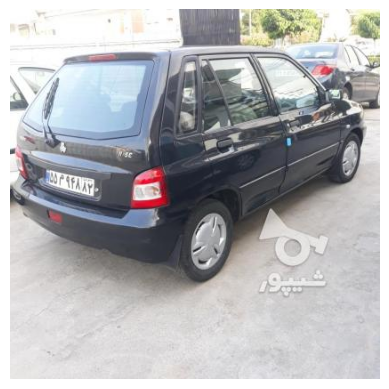

In [ ]:
image = Image.open('/content/32.jpg').convert('RGB')
# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
# Define the question to ask about the image
question = "what is in the image?"
# Create a message in the required format for the model
# This is a list of dictionaries, each with a 'role' and 'content' key
msgs = [{'role': 'user', 'content': question}]

In [ ]:
# Use the model to generate a response
# Pass the image, message list, tokenizer, and sampling parameters to the modl's chat method
res = model.chat(
    image=image,
    msgs=msgs,
    tokenizer=tokenizer,
    temperature=0.1,

)

# Print the model's response
print(res)

The image shows a black hatchback car parked in what appears to be a parking lot. The car is positioned facing away from the camera, and there are other cars in the background. The license plate of the car is visible, but it's not clear enough to read. There is also a logo on the back of the car, which might indicate the make or model, but without clearer details, it's not possible to identify it. The overall setting suggests an outdoor parking area during daylight hours.
